### Model Selection

In [1]:
# narrow down the models and try to find the best fit model for the data 
import pandas as pd 

In [2]:
# Problem type:
# Classification, Clustering or Regression 
# Take regression problem and covert into classification 


In [3]:
# All models have some predictive error
# Look for model that is good enough 
data = pd.read_parquet('house.parquet')
data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,3,3,2,7,5,...,61,0,0,0,0,NaN,0,2,2008,208500
2,20,80.0,9600,1,3,3,3,2,6,8,...,0,0,0,0,0,NaN,0,5,2007,181500
3,60,68.0,11250,1,2,3,3,2,7,5,...,42,0,0,0,0,NaN,0,9,2008,223500
4,70,60.0,9550,1,2,3,3,2,7,5,...,35,272,0,0,0,NaN,0,2,2006,140000
5,60,84.0,14260,1,2,3,3,2,8,5,...,84,0,0,0,0,NaN,0,12,2008,250000


In [4]:
data.describe()
#data = data.fillna(-1)

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,0.995890,2.591781,2.786301,2.998630,1.937671,6.099315,5.575342,...,46.660274,21.954110,3.409589,15.060959,2.758904,2.714286,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,0.063996,0.582296,0.678327,0.052342,0.276232,1.382997,1.112799,...,66.256028,61.119149,29.317331,55.757415,40.177307,1.253566,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,1.000000,3.000000,3.000000,3.000000,2.000000,7.000000,6.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,3.000000,2.000000,10.000000,9.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


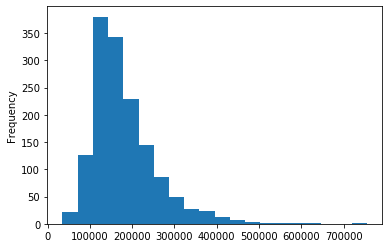

In [5]:
data['SalePrice'].plot.hist(bins=20)

In [6]:
# Converting into Categories  cut() and qcut()
# cut convert into 3 bins 
data['Target']= pd.cut(data['SalePrice'],bins=3, labels=[1,2,3])
data['Target'].value_counts()/len(data)

1    0.891781
2    0.102740
3    0.005479
Name: Target, dtype: float64

In [7]:
data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,Target
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,3,3,2,7,5,...,0,0,0,0,NaN,0,2,2008,208500,1
2,20,80.0,9600,1,3,3,3,2,6,8,...,0,0,0,0,NaN,0,5,2007,181500,1
3,60,68.0,11250,1,2,3,3,2,7,5,...,0,0,0,0,NaN,0,9,2008,223500,1
4,70,60.0,9550,1,2,3,3,2,7,5,...,272,0,0,0,NaN,0,2,2006,140000,1
5,60,84.0,14260,1,2,3,3,2,8,5,...,0,0,0,0,NaN,0,12,2008,250000,1


In [8]:
#data = data.drop('PoolQC',axis=1)


In [9]:
data['Target']= pd.qcut(data['SalePrice'],q=3, labels=[1,2,3])
data['Target'].value_counts()/len(data)

2    0.335616
1    0.333562
3    0.330822
Name: Target, dtype: float64

In [10]:
data.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice,Target
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,3,3,2,7,5,...,0,0,0,0,NaN,0,2,2008,208500,3
2,20,80.0,9600,1,3,3,3,2,6,8,...,0,0,0,0,NaN,0,5,2007,181500,2
3,60,68.0,11250,1,2,3,3,2,7,5,...,0,0,0,0,NaN,0,9,2008,223500,3
4,70,60.0,9550,1,2,3,3,2,7,5,...,272,0,0,0,NaN,0,2,2006,140000,2
5,60,84.0,14260,1,2,3,3,2,8,5,...,0,0,0,0,NaN,0,12,2008,250000,3


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score 


In [12]:

X = data.drop(['SalePrice','Target'],axis=1).fillna(-1)
y = data['Target']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=0)

In [14]:
model = SVC()
model1 = LinearSVC()

In [15]:
model.fit(X_train,y_train)
model1.fit(X_train,y_train)
yp1 = model.predict(X_test)
yp2 = model1.predict(X_test)
acc1 = accuracy_score(y_test,yp1)
acc2 = accuracy_score(y_test,yp2)

/home1/y2021/s2140019/.local/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [16]:
print('Accuracy of SVC is ',acc1)
print("Accuracy of Linear SVC is ", acc2 )

Accuracy of SVC is  0.613013698630137
Accuracy of Linear SVC is  0.702054794520548


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
yp = knn.predict(X_test)
accuracy_score(y_test,yp)

0.708904109589041

In [19]:
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
yp1 = model.predict(X_test)
accuracy_score(y_test,yp1)

0.613013698630137

In [20]:
model = SVC(kernel='sigmoid')
model.fit(X_train,y_train)
yp1 = model.predict(X_test)
accuracy_score(y_test,yp1)

0.4041095890410959

In [21]:
# model = SVC(kernel='linear')
# model.fit(X_train,y_train)
# yp1 = model.predict(X_test) 

## Project - Parameters with Highest Impact on House Price Class 

needs to ind which 10 parameters matters most to determine the ranges of house 

In [22]:
# Import Libraries 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [23]:
data1 = pd.read_parquet('house.parquet')
data1.head()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,1,3,3,3,2,7,5,...,61,0,0,0,0,NaN,0,2,2008,208500
2,20,80.0,9600,1,3,3,3,2,6,8,...,0,0,0,0,0,NaN,0,5,2007,181500
3,60,68.0,11250,1,2,3,3,2,7,5,...,42,0,0,0,0,NaN,0,9,2008,223500
4,70,60.0,9550,1,2,3,3,2,7,5,...,35,272,0,0,0,NaN,0,2,2006,140000
5,60,84.0,14260,1,2,3,3,2,8,5,...,84,0,0,0,0,NaN,0,12,2008,250000


In [24]:
len(data1)

1460

In [25]:
data1.describe()

,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,0.995890,2.591781,2.786301,2.998630,1.937671,6.099315,5.575342,...,46.660274,21.954110,3.409589,15.060959,2.758904,2.714286,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,0.063996,0.582296,0.678327,0.052342,0.276232,1.382997,1.112799,...,66.256028,61.119149,29.317331,55.757415,40.177307,1.253566,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,1.000000,3.000000,3.000000,3.000000,2.000000,7.000000,6.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,3.500000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,3.000000,2.000000,10.000000,9.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


In [26]:
data1.shape

(1460, 56)

In [27]:
data1.dtypes


MSSubClass         int64
LotFrontage      float64
LotArea            int64
Street             int64
LotShape           int64
LandContour        int64
Utilities          int64
LandSlope          int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
ExterQual          int64
ExterCond          int64
BsmtQual         float64
BsmtCond         float64
BsmtExposure     float64
BsmtFinType1     float64
BsmtFinSF1         int64
BsmtFinType2     float64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
HeatingQC          int64
CentralAir         int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Fireplaces         int64
FireplaceQu      float64


In [28]:
data1.isnull().sum()

MSSubClass          0
LotFrontage       259
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LandSlope           0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Fireplaces          0
FireplaceQu       690
GarageYrBlt        81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
WoodDeckSF

In [29]:
import numpy as np 

In [30]:
data1 = data1.drop('PoolQC' ,axis=1)

In [31]:
#data1 = data1.fillna(-1)

In [32]:
from sklearn.feature_selection import VarianceThreshold
quasi = VarianceThreshold(threshold=0.1)
quasi.fit(data1)

VarianceThreshold(threshold=0.1)

In [33]:
len(data1.columns[quasi.get_support()])

46

In [34]:
quasi_constant = [col for col in data1.columns if col not in data1.columns[quasi.get_support()]]

In [35]:
quasi_constant

['Street',
 'Utilities',
 'LandSlope',
 'BsmtCond',
 'CentralAir',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'GarageQual',
 'GarageCond']

In [36]:
train = data1[data1.columns[quasi.get_support()]]
train.shape

(1460, 46)

In [37]:
corr = train.corr()
feature= 'TotRmsAbvGrd'

In [38]:
(corr[feature].iloc[:corr.columns.get_loc(feature)]>.8).any()

True

In [39]:
corr_constant = [feature for feature in corr.columns if ((corr[feature].iloc[:corr.columns.get_loc(feature)]>.8).any())]

In [40]:
corr_constant

['BsmtFinSF2', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [41]:
data1['Target'] = pd.qcut(data1['SalePrice'],q=3, labels=[1,2,3])


In [51]:
X = data1.drop(['SalePrice','Target']+ quasi_constant+corr_constant,axis=1).fillna(-1)

In [52]:
y = data1['Target']


In [53]:
# Split the data into test train 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state = 42 )

In [54]:
fs = SFS(KNeighborsClassifier(),k_features=10,verbose=2)
fs.fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.6s finished

[2022-07-13 13:33:38] Features: 1/10 -- score: 0.5872968709878581[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    1.6s finished

[2022-07-13 13:33:39] Features: 2/10 -- score: 0.6832104471589451[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    1.5s finished

[2022-07-13 13:33:41] Features: 3/10 -- score: 0.7140383698323612[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=10,
                          verbose=2)

In [55]:
fs.k_feature_idx_

(0, 3, 5, 12, 23, 24, 25, 27, 28, 30)

In [56]:
X_train.columns[list(fs.k_feature_idx_)]

Index(['MSSubClass', 'LotShape', 'OverallQual', 'BsmtQual', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'Fireplaces', 'GarageCars'],
      dtype='object')

In [57]:
for item in X_train.columns[list(fs.k_feature_idx_)]:
    loc = corr['SalePrice'].sort_values(ascending=False).index.get_loc(item)
    print(item,loc)

MSSubClass 43
LotShape 45
OverallQual 1
BsmtQual 5
BsmtFullBath 28
FullBath 10
HalfBath 25
KitchenQual 4
Fireplaces 16
GarageCars 6


In [59]:
corr_constant

['BsmtFinSF2', '1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [60]:
quasi_constant

['Street',
 'Utilities',
 'LandSlope',
 'BsmtCond',
 'CentralAir',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'GarageQual',
 'GarageCond']

In [58]:
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.644019
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.352958
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
FireplaceQu      0.295794
HalfBath         0.284108
BsmtFinType1     0.277436
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
ExterCond        0.018899
BsmtFinSF2      -0.011378
MiscVal         -0.021190
LowQualFinSF